In [45]:
import requests
from rdkit import Chem
from pathlib import Path
import time
from collections import Counter
import pandas as pd
from rdkit.Chem import Draw
from PIL import Image
from IPython.display import Image

In [4]:
# substance db is redundant
# compound db is unique

In [17]:
# get sids for cid 1174 uracil

cid = 1174
url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/sids/txt'
res = requests.get(url)
sids = res.text.split()
print(len(sids))

381


In [22]:
# download depositor structure data for sids

chunk_size = 50
num_chunks = (len(sids) // chunk_size) + 1

for i in range(num_chunks):
    
    print('processing chunk {}'.format(i))
    idx1 = chunk_size * i
    idx2 = chunk_size * (i+1)
    
    sids_str = ','.join(sids[idx1:idx2])
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/{sids_str}/record/sdf'
    res = requests.get(url)
    
    with open('cids2sids-uracil.sdf', 'a') as fo:
        fo.write(res.text)
        time.sleep(0.2)

processing chunk 0
processing chunk 1
processing chunk 2
processing chunk 3
processing chunk 4
processing chunk 5
processing chunk 6
processing chunk 7


In [32]:
# convert structures in sdf to SMILES
# count unique SMILES

mols = Chem.SDMolSupplier('cids2sids-uracil.sdf')
smiles = []
for mol in mols:
    smile = Chem.MolToSmiles(mol, isomericSmiles=True)
    smiles.append(smile)
    
smiles = Counter(smiles)
for k, v in smiles.most_common():
    print('{:>3} {}'.format(v, k))

257 O=c1cc[nH]c(=O)[nH]1
 88 Oc1ccnc(O)n1
 15 
  7 O=c1ccnc(O)[nH]1
  5 O=c1nc(O)cc[nH]1
  5 O=c1nccc(O)[nH]1
  4 O=c1cc[nH]c(O)n1


In [34]:
# check mols missing smile 

for mol in mols:
    smile = Chem.MolToSmiles(mol, isomericSmiles=True)
    
    if smile == '':
        print(mol.GetProp('PUBCHEM_SUBSTANCE_ID'), ':', mol.GetProp('PUBCHEM_SUBS_AUTO_STRUCTURE'))
        print()

50608295 : Deposited Substance chemical structure was generated via Synonym "CID1174" to be CID 1174

76715622 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174

313082517 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174

319449334 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174

329735657 : Deposited Substance chemical structure was generated via Synonym(s) "66-22-8" and Synonym Consistency to be CID 1174

330000149 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174

376019281 : Deposited Substance chemical structure was generated via Synonym(s) "2,4(1H,3H)-PYRIMIDINEDIONE", "66-22-8" and Synonym Consistency to be CID 1174

381002398 : Deposited Substance chemical structure was generated via Synonym(s) "66-22-8" and Synonym Consistency to be CID 1174

381013941 : Deposited S

O=c1cc[nH]c(=O)[nH]1


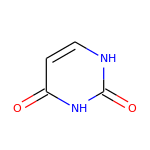

Oc1ccnc(O)n1


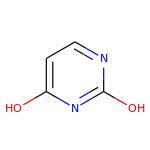

O=c1nc(O)cc[nH]1


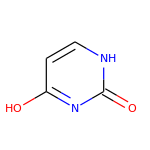

O=c1nccc(O)[nH]1


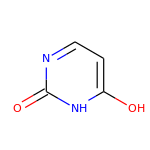

O=c1ccnc(O)[nH]1


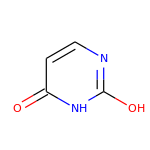

O=c1cc[nH]c(O)n1


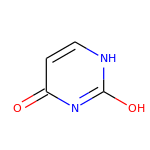

In [38]:
# images from smiles

for smile in smiles.keys():
    # skip blanks
    if smile != '':
        print(smile)
        img = Draw.MolToImage(Chem.MolFromSmiles(smile), size=(150, 150))
        display(img)

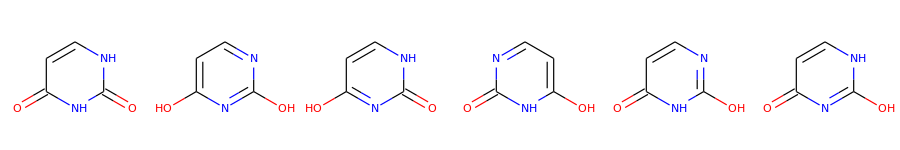

In [43]:
# save images to file and display together

images = []
for smile in smiles.keys():
    if smile != '':
        img = Draw.MolToImage(Chem.MolFromSmiles(smile), size=(150, 150))
        images.append(img)
        
big_img = Image.new('RGB', (900, 150))
for i in range(0, len(images)):
    big_img.paste(images[i], (i*150, 0))
    
display(big_img)
#big_img.save('image_grid.png')

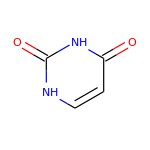

In [44]:
# get standardized structure image

res = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/1174/property/isomericsmiles/txt')
img = Draw.MolToImage(Chem.MolFromSmiles(res.text.strip()), size=(150, 150))
img

In [46]:
# get image from pubchem
Image(url='https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/1174/record/PNG?image_size=300x300')

In [69]:
# non-canonical smiles for uracil cid 1174
# count number of unique non=canonical smiles
# get frequecy

def ex_1a():
    
    mols = Chem.SDMolSupplier('cids2sids-uracil.sdf')
    smiles = []
    for mol in mols:
        smile = Chem.MolToSmiles(mol, canonical=False)
        
        if smile != '':
            smiles.append(smile)
        
    smiles = Counter(smiles)
    print('{} unique non-canonical smiles'.format(len(smiles)))
    print()
        
    for k, v in smiles.most_common():
        print('{:>3} {}'.format(v, k))
        
    return smiles

In [71]:
smiles = ex_1a()

25 unique non-canonical smiles

227 O=c1[nH]c(=O)cc[nH]1
 49 Oc1nc(O)ccn1
 32 Oc1nc(O)ncc1
  8 [nH]1c(=O)[nH]c(=O)cc1
  7 c1c[nH]c(=O)[nH]c1=O
  5 [nH]1c(=O)[nH]ccc1=O
  5 Oc1[nH]c(=O)ccn1
  4 [nH]1c(=O)cc[nH]c1=O
  4 O=c1[nH]c(O)ccn1
  3 Oc1nc(=O)cc[nH]1
  2 O=c1nc(O)cc[nH]1
  2 n1c(O)nccc1O
  2 O=c1[nH]ccc(=O)[nH]1
  2 O=c1[nH]ccc(O)n1
  2 c1(=O)[nH]c(=O)cc[nH]1
  2 c1cnc(O)nc1O
  2 Oc1nccc(O)n1
  1 O=c1cc[nH]c(=O)[nH]1
  1 O=c1[nH]c(=O)[nH]cc1
  1 c1(O)[nH]c(=O)ccn1
  1 [nH]1c(=O)nccc1O
  1 n1c(O)[nH]c(=O)cc1
  1 Oc1[nH]ccc(=O)n1
  1 [nH]1c(=O)nc(O)cc1
  1 n1c(O)nc(O)cc1


In [111]:
# draw grid image

def ex_1b(smiles):
    
    smiles = [Chem.MolFromSmiles(k) for k, v in smiles.items()]
    img = Draw.MolsToGridImage(smiles, subImgSize=(300, 300))
    display(img)

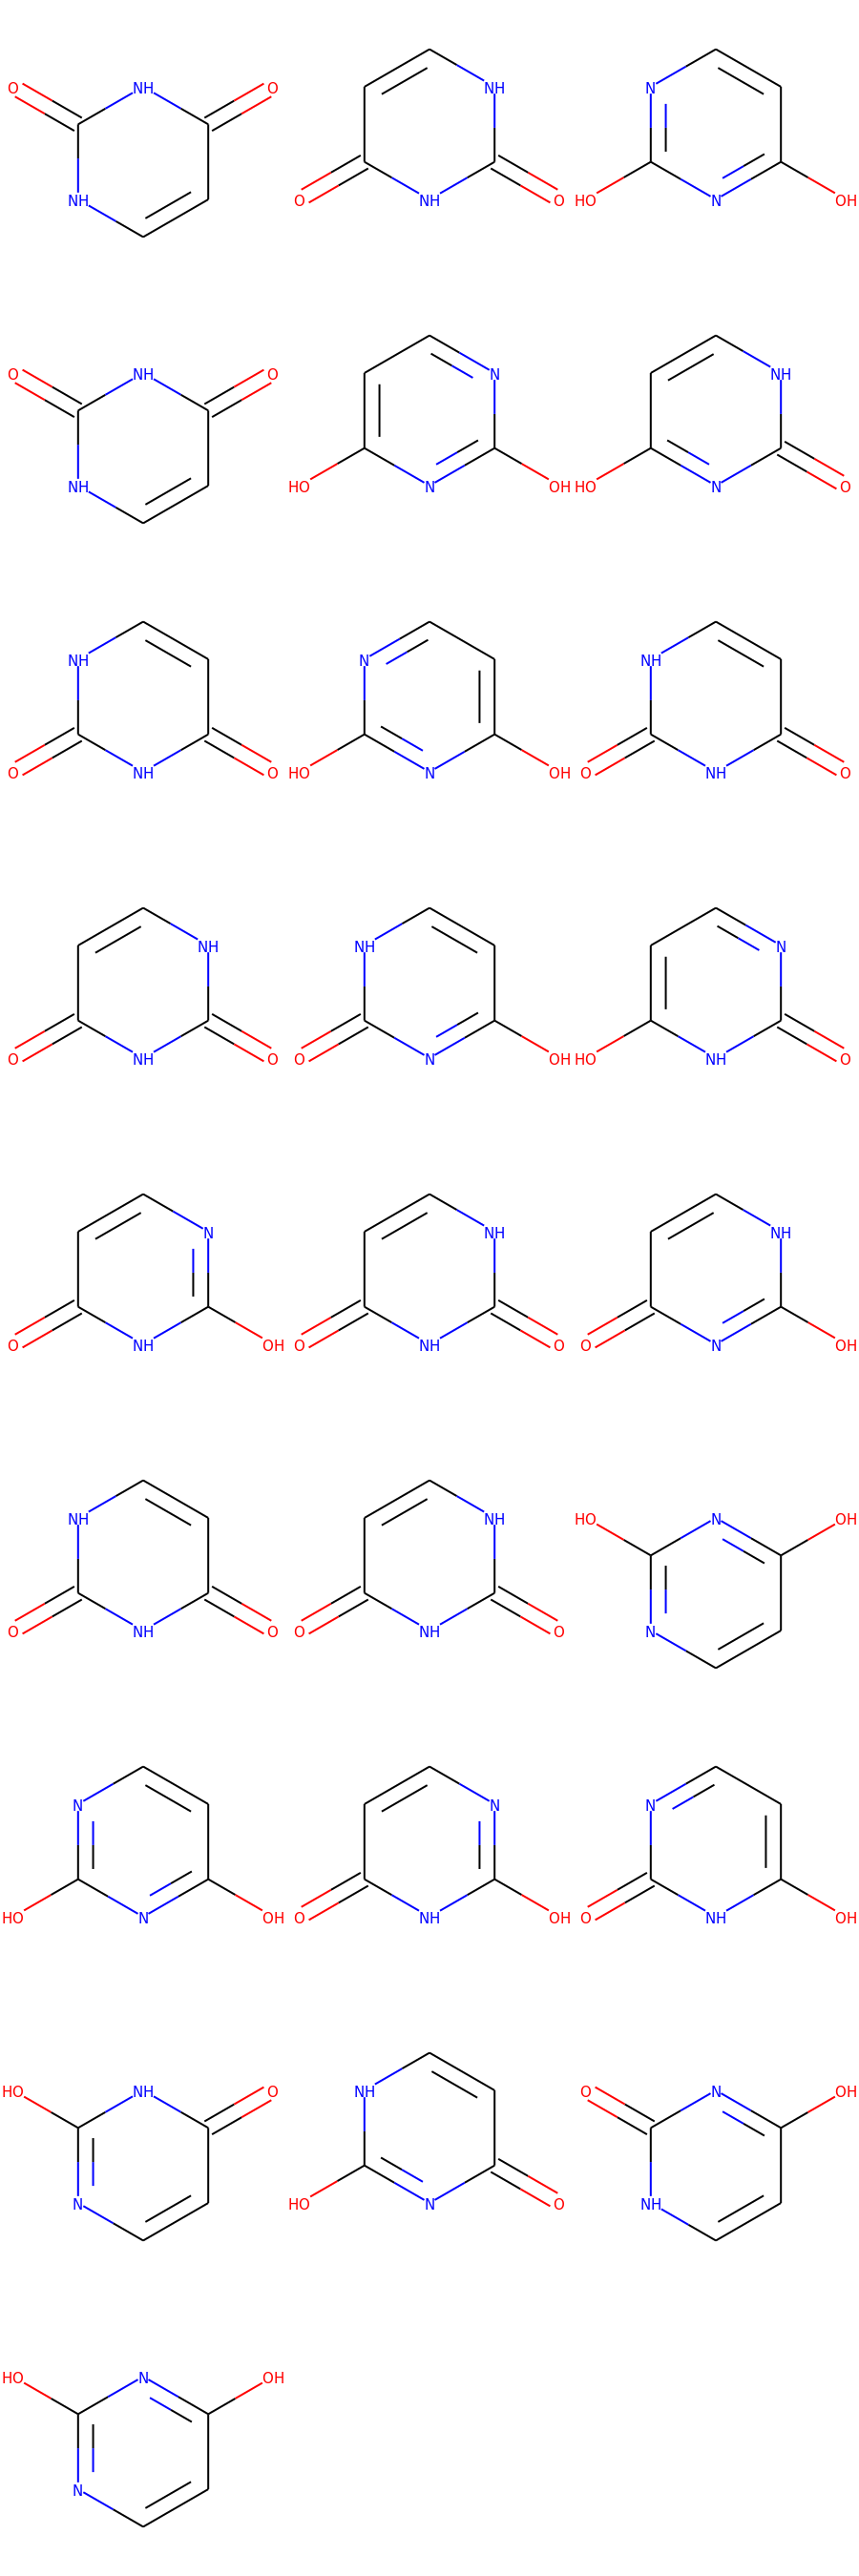

In [112]:
ex_1b(smiles)

In [120]:
# get sids for cid 135398634
# download sdf
# generate canonical smiles
# identify unique smiles
# draw structure for each unique smile

def ex_1c(cid):
    
    # get sids from cid
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/sids/txt'
    r = requests.get(url)
    print(r.url)
    assert r.status_code == 200, f'invalid request {cid}'
    
    # chunk sids into 100
    sids = r.text.split()
    chunk_size = 100
    chunks = (len(sids) // chunk_size) + 1
    
    # download sdf
    for i in range(chunks):
        
        idx1 = chunk_size * i
        idx2 = chunk_size * (i+1)
        
        sids_str = ','.join(sids[idx1:idx2])
        url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/{sids_str}/record/sdf'
        r = requests.get(url)
    
    with open(f'{cid}.sdf', 'a') as fo:
        fo.write(r.text)
        time.sleep(0.2)
    
    # generate canonical smiles
    mols = Chem.SDMolSupplier(f'{cid}.sdf')
    smiles = []
    for mol in mols:
        smile = Chem.MolToSmiles(mol)
        smiles.append(smile)
        
    # get unique smiles
    smiles_counter = Counter(smiles)
    
    # draw unique smiles
    smiles = [Chem.MolFromSmiles(k) for k in smiles_counter.keys()]
    img = Draw.MolsToGridImage(smiles, subImgSize=(300, 300))
    display(img)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/135398634/sids/txt


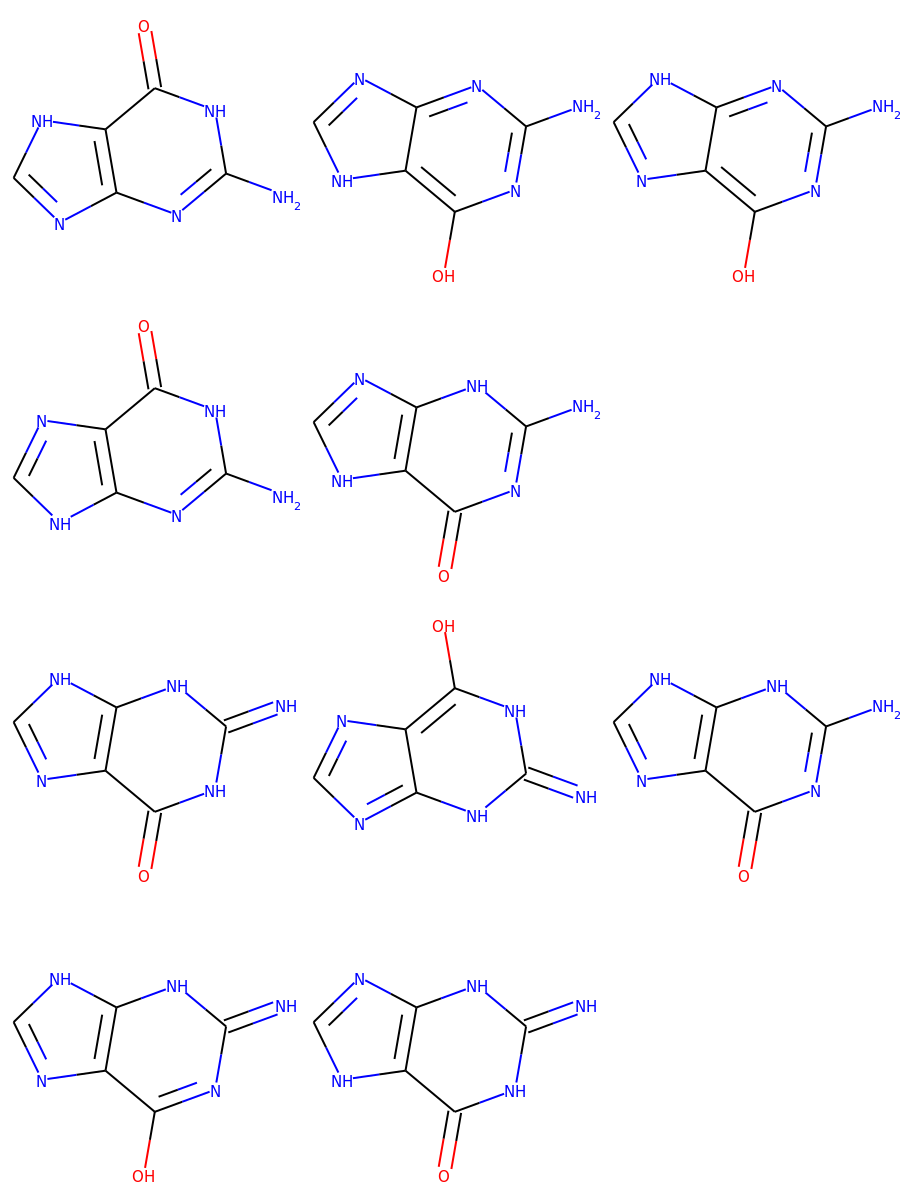

In [121]:
cid = '135398634'
ex_1c(cid)

In [126]:
# sids from naem glucose
# download sdf
# generate canonical smiles
# draw structures

def ex_1d(name):
    
    # get sids from name
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/name/{name}/sids/txt'
    r = requests.get(url)
    print(r.url)
    assert r.status_code == 200, f'invalid request {name}'
    
    # chunk sids into 100
    sids = r.text.split()
    chunk_size = 100
    chunks = (len(sids) // chunk_size) + 1
    
    # download sdf
    for i in range(chunks):
        
        idx1 = chunk_size * i
        idx2 = chunk_size * (i+1)
        
        sids_str = ','.join(sids[idx1:idx2])
        url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/{sids_str}/record/sdf'
        r = requests.get(url)
    
    with open(f'{name}.sdf', 'a') as fo:
        fo.write(r.text)
        time.sleep(0.2)
    
    # generate canonical smiles
    mols = Chem.SDMolSupplier(f'{name}.sdf')
    smiles = []
    for mol in mols:
        smile = Chem.MolToSmiles(mol)
        smiles.append(smile)
        
    # get unique smiles
    smiles_counter = Counter(smiles)
    
    # draw unique smiles
    smiles = [Chem.MolFromSmiles(k) for k in smiles_counter.keys()]
    img = Draw.MolsToGridImage(smiles, subImgSize=(300, 300))
    display(img)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/name/glucose/sids/txt


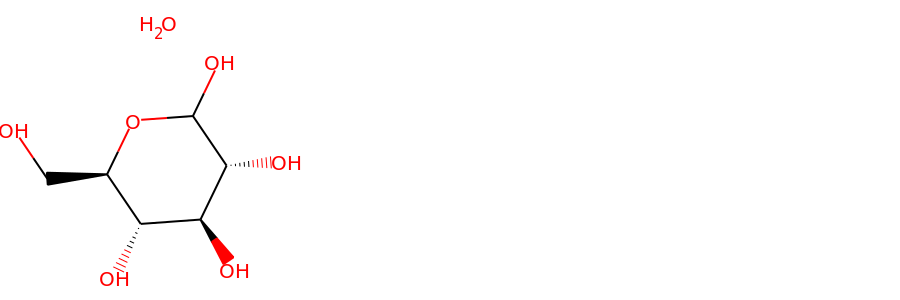

In [127]:
ex_1d('glucose')

In [143]:
# get sids from glucose name
# sid to cid
# unique cids
# isomeric smiles from cids through pug-rest
# draw structures

def ex_1e(name):
    
    # sids
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/name/{name}/sids/txt'
    r = requests.get(url)
    assert r.status_code == 200, f'invalid request {name}'
    
    sids = r.text.split()
    sids = ','.join(sids)
    
    # sid to cid
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/{sids}/cids/txt'
    r = requests.get(url)
    assert r.status_code == 200, f'invalid request {sids}'
    
    cids = r.text.split()
    cids = set(cids)
    cids = ','.join(cids)
    
    # unique cids to isomeric smiles
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cids}/property/isomericsmiles/txt'
    r = requests.get(url)
    assert r.status_code == 200, f'invalid request {cids}'
    
    smiles = r.text.split()
    
    # draw smiles
    mols = [Chem.MolFromSmiles(smile) for smile in smiles]
    img = Draw.MolsToGridImage(mols, subImgSize=(300, 300))
    display(img)

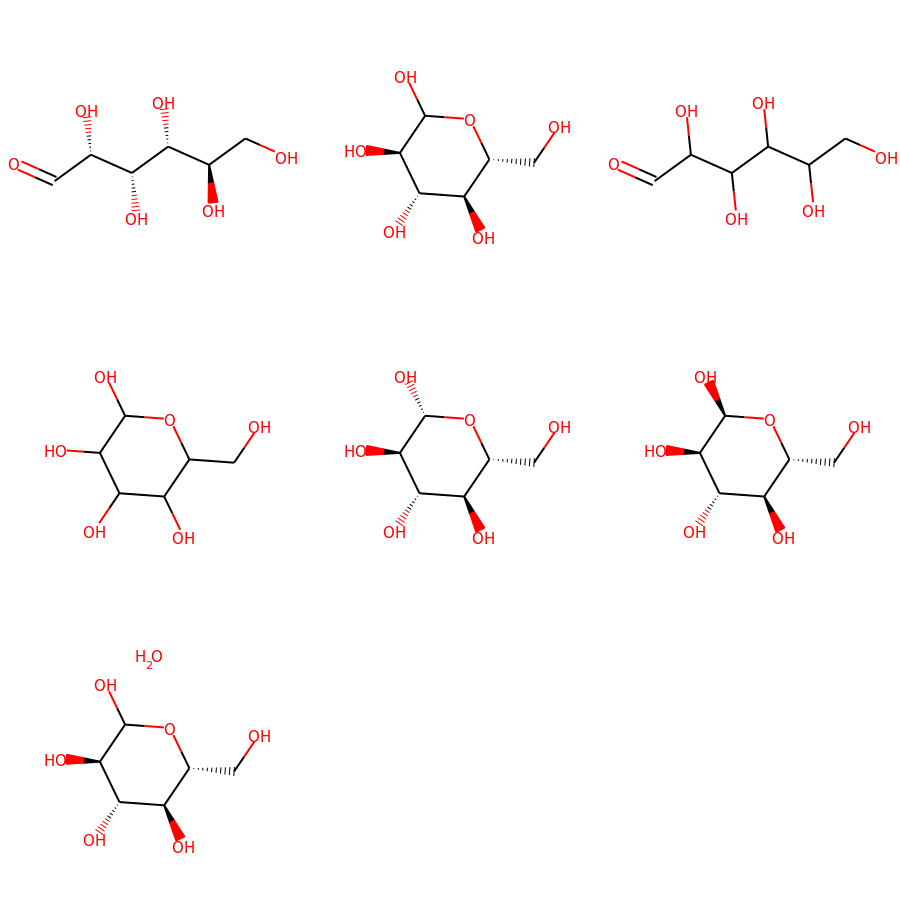

In [144]:
ex_1e('glucose')